In [86]:
import pandas as pd
col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
pima=pd.read_csv("C:/Users/ABHISHEK/Downloads/study material/5th sem/Machine Learning/diabetes.csv")

In [87]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] 
y=pima.Outcome


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [90]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
logreg = LogisticRegression(max_iter=1000, random_state=16)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)


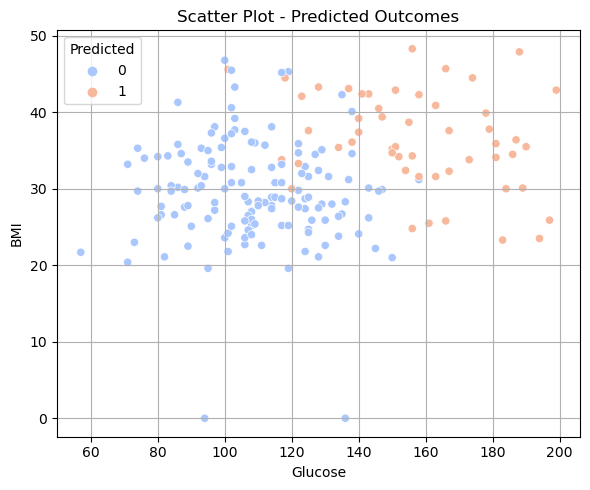

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
X_test_plot = X_test.copy()
X_test_plot['Predicted'] = y_pred

# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(data=X_test_plot, x='Glucose', y='BMI', hue='Predicted', palette='coolwarm')
plt.title("Scatter Plot - Predicted Outcomes")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()


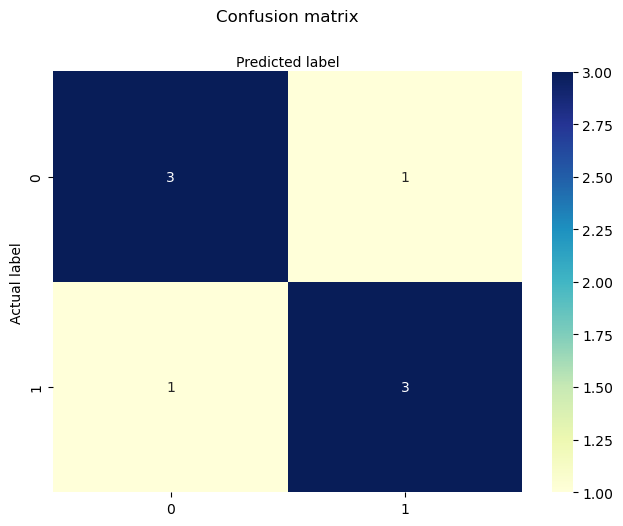

In [92]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("my_plot3.1.png", dpi=300)



In [75]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



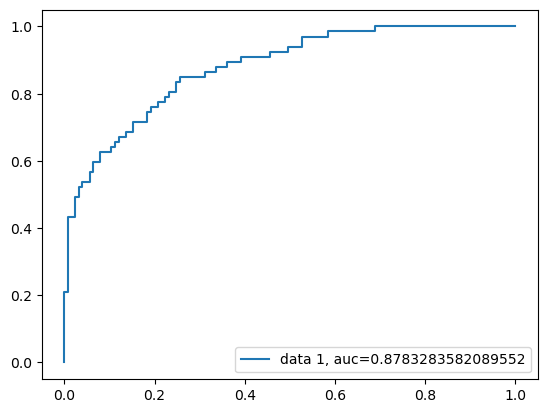

In [93]:
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig("my_plot3.2.png", dpi=300)
plt.show()